In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('data_cleaned.csv')
data.shape

(891, 25)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   Fare        891 non-null    float64
 3   Pclass_1    891 non-null    int64  
 4   Pclass_2    891 non-null    int64  
 5   Pclass_3    891 non-null    int64  
 6   Sex_female  891 non-null    int64  
 7   Sex_male    891 non-null    int64  
 8   SibSp_0     891 non-null    int64  
 9   SibSp_1     891 non-null    int64  
 10  SibSp_2     891 non-null    int64  
 11  SibSp_3     891 non-null    int64  
 12  SibSp_4     891 non-null    int64  
 13  SibSp_5     891 non-null    int64  
 14  SibSp_8     891 non-null    int64  
 15  Parch_0     891 non-null    int64  
 16  Parch_1     891 non-null    int64  
 17  Parch_2     891 non-null    int64  
 18  Parch_3     891 non-null    int64  
 19  Parch_4     891 non-null    i

In [4]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [5]:
y = data.Survived
X = data.drop(columns=['Survived'],axis=1)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=101,stratify=y,test_size=0.25)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 24)
(223, 24)
(668,)
(223,)


In [8]:
#importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
# how to import decision tree regressor
# from sklearn.tree import DecisionTreeRegressor

In [9]:
dt = DecisionTreeClassifier(random_state=10)
# Training the model on Training data
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=10)

In [10]:
dt.score(X_train,y_train)

0.9880239520958084

In [11]:
y_pred = dt.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7533632286995515

### Performance Optimization

In [12]:
# Changing the max_depth

train_acc = []
validation_acc = []
for depth in range(1,10):
    dt = DecisionTreeClassifier(max_depth=depth,random_state=10)
    dt.fit(X_train,y_train)
    train_acc.append(dt.score(X_train,y_train))
    validation_acc.append(dt.score(X_test,y_test))

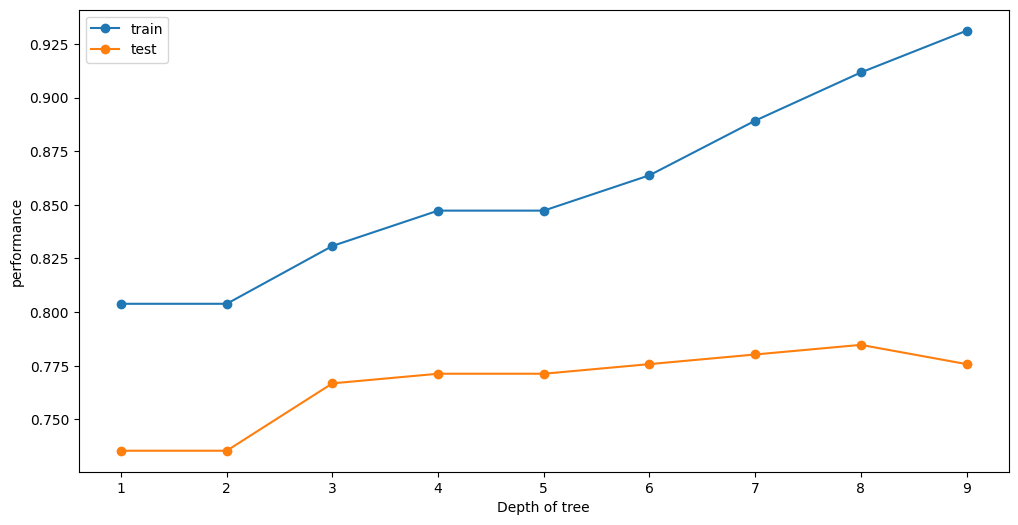

In [33]:
plt.figure(figsize=(12,6))
frame = pd.DataFrame({'max_Depth': range(1,10),'train':train_acc,'test':validation_acc})
plt.plot(frame['max_Depth'], frame['train'],marker='o')
plt.plot(frame['max_Depth'],frame['test'],marker='o')
plt.xlabel( 'Depth of tree')
plt.ylabel( 'performance' )
plt.legend(['train','test'])

### Similarly we can tweak the folowing parameter to get more generalised model

<ul>
    <li>max_leaf_nodes
    <li>min_samples_leaf
    <li>min_samples_split
</ul>